In [1]:
# !pip install matplotlib


In [81]:
from osgeo import gdal
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import re

In [118]:
gdal.UseExceptions()

def pad_number(match):
    number = int(match.group(1))
    return format(number, "02d")

gdal_ds = []
srtm_tail_h_cnt = 72
srtm_tail_v_cnt = 24

# for v in range(1, srtm_tail_v_cnt + 1):
#     ds_sub_list = []
#     for h in range(1, srtm_tail_h_cnt + 1):
#         v_num = re.sub(r"^(\d+)", pad_number, str(v))
#         h_num = re.sub(r"^(\d+)", pad_number, str(h))
        
#         path_to_dir = './' + h_num + '_' + v_num
#         path_to_file = path_to_dir + '/srtm_' + h_num + '_' + v_num + '.tif'
        
#         if(os.path.isdir(path_to_dir)):
#             if(os.path.isfile(path_to_file)):
#                 ds_sub_list.append(gdal.Open(path_to_file))
                
#     gdal_ds += [ds_sub_list]
    
# print(gdal_ds)

ds1 = gdal.Open('./41_01/srtm_41_01.tif')
ds2 = gdal.Open('./42_01/srtm_42_01.tif')
ds3 = gdal.Open('./43_01/srtm_43_01.tif')
ds4 = gdal.Open('./41_02/srtm_41_02.tif')
ds5 = gdal.Open('./42_02/srtm_42_02.tif')
ds6 = gdal.Open('./43_02/srtm_43_02.tif')

gdal_ds = [[ds1, ds2, ds3], [ds4, ds5, ds6]]

elevations_list = [[], []]

for i in range(len(gdal_ds[0])):
    band1 = gdal_ds[0][i].GetRasterBand(1)
    band2 = gdal_ds[1][i].GetRasterBand(1)
    elevations_list[0] += [band1.ReadAsArray()]
    elevations_list[1] += [band2.ReadAsArray()]

elev_arr = np.asarray(elevations_list)
    
print(elev_arr)
print(np.shape(elev_arr))
len(elev_arr)

[[[[-32768 -32768 -32768 ... -32768 -32768 -32768]
   [-32768 -32768 -32768 ... -32768 -32768 -32768]
   [-32768 -32768 -32768 ... -32768 -32768 -32768]
   ...
   [-32768 -32768 -32768 ...    127    126    127]
   [-32768 -32768 -32768 ...    127    128    128]
   [-32768 -32768 -32768 ...    127    129    130]]

  [[-32768 -32768 -32768 ...      1      1 -32768]
   [-32768 -32768 -32768 ... -32768 -32768 -32768]
   [-32768 -32768 -32768 ... -32768 -32768 -32768]
   ...
   [   128    128    129 ...    162    163    164]
   [   129    129    130 ...    162    162    162]
   [   131    131    131 ...    161    160    160]]

  [[-32768      0      1 ...    227    230    231]
   [-32768      0      0 ...    227    230    231]
   [-32768      0      0 ...    235    236    236]
   ...
   [   165    164    163 ...    177    180    181]
   [   162    162    161 ...    180    182    181]
   [   160    160    159 ...    178    181    179]]]


 [[[-32768 -32768 -32768 ...    130    131    131]
  

2

In [86]:
def pad_number(match):
    number = int(match.group(1))
    return format(number, "02d")

fixed_text = re.sub(r"^(\d+)", pad_number, "1")
fixed_text

'01'

In [10]:
# cnt = 0
# arr = np.empty([10, 10])

# for i in range(10):
#     print(elevation[i, :10])
#     arr[i] = elevation[i, :10]
    
# arr
    

### Get rectangle side length function

In [11]:
def get_scale_in_degrees_and_rect_side_in_px(seconds_cnt):
    # constants
    min_scale = 3
    default_pixel_num = 1200
    overlap_pixel_num = 1
    
    scale_in_degrees = seconds_cnt / min_scale
    rect_side = default_pixel_num * scale_in_degrees
    
    return (scale_in_degrees, rect_side)

In [12]:
get_scale_in_degrees_and_rect_side_in_px(12)

(4.0, 4800.0)

### Function takes big 2D array and returns smaller 2D array in according to passed sizes

In [13]:
# The function takes big 2D array and returns smaller 2D array in according to passed sizes
# If the function can't satisfy passed sizes of array, it returns array with less sizes
def get_2D_array_from_bigger_2D_array(init_arr, left_border, top_border,
                                        tile_size, overlap):
    
    bottom_border = len(init_arr)
    if(bottom_border - top_border > tile_size + overlap):
        bottom_border =  top_border + tile_size + overlap
    right_border = len(init_arr)
    if(right_border - left_border > tile_size + overlap):
        right_border = left_border + tile_size + overlap
        
#     res_arr = np.empty([bottom_border - top_border, right_border - left_border])
    res_arr = []
    
    for i in range(bottom_border - top_border):
        res_arr += [init_arr[i + top_border, left_border : right_border]]
            
    return res_arr
        

In [14]:
temp = get_2D_array_from_bigger_2D_array(elevations_list[0], 1200, 2400, 2400, 1)
temp


[array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-32768, -32768, -32768, ..., -32768, -32768, -32768], dtype=int16),
 array([-327

In [15]:
np.shape(temp)

(2401, 2401)

### Function returns 2D array combined by equal axis from two 2D arrays

In [105]:
def combine_two_2d_arrays_by_equal_axis(first_arr, second_arr):
    if(first_arr.shape[0] == second_arr.shape[0]):
        return np.hstack((first_arr, second_arr))
    if(first_arr.shape[1] == second_arr.shape[1]):
        return np.vstack((first_arr, second_arr))

In [106]:
def get_2d_index_by_element_number(ncols, number):
    element_row = 0
    element_col = 0
    
    while number > ncols:
        number -= ncols
        element_row += 1
    
    element_col = number - 1
    
    return (element_row, element_col)

### The function takes four elevation arrays (rectangles) and split top left one in tails with defined size

In [133]:
def split_rect_in_defined_tails(rects, tail_size, left_border, top_border, overlap):
    # Combine all rects to one entire rect
    two_top_combined_rects = np.hstack((rects[0], rects[1]))
    two_bottom_combined_rects = np.hstack((rects[2], rects[3]))
    entire_combined_rect = np.vstack((two_top_combined_rects, two_bottom_combined_rects))
    
#     print(np.shape(two_top_combined_rects))
#     print(np.shape(two_bottom_combined_rects))
#     print(np.shape(entire_combined_rect))
    
    # Getting size of default rect (6000 px)
    rect_side_size = rects[0].shape[0]
    
    free_h_space = rect_side_size - left_border
    free_v_space = rect_side_size - top_border

    tails_cnt_in_h_axis = math.ceil(free_h_space / tail_size)
    
    right_shift = tails_cnt_in_h_axis * (tail_size) - free_h_space
    bottom_shift = tails_cnt_in_h_axis * (tail_size) - free_v_space
    
    res_tails = []
            
    for i in range(tails_cnt_in_h_axis):
        for j in range(tails_cnt_in_h_axis):
            res_tails += [get_2D_array_from_bigger_2D_array(entire_combined_rect, left_border + tail_size * j, 
                                                             top_border + tail_size * i, tail_size, overlap)]
#             print(left_border + tail_size * j, top_border + tail_size * i)
        
    return (res_tails, right_shift, bottom_shift)

### The function calculates georeferencing data for tails

In [134]:
def get_georeferencing_data(scale_in_deg, img_array, basic_x0, basic_y0, dx, dy, ncols, count):
    
    # get width and height of image array
    n_img_rows, n_img_cols = img_array.shape

    # The shift is one tile side length in degrees. It's should be float value
    shift = scale_in_deg

    img_row, img_col = get_2d_index_by_element_number(ncols, count)
    
    x0 = basic_x0 - shift * img_row
    y0 = basic_y0 + shift * img_col
    x1 = (x0 - dx * n_img_rows)
    y1 = (y0 + abs(dy) * n_img_cols)
    
    return (x0, x1, y0, y1)

### The function displays data with grid of plots

In [135]:
def plot_image_grid(images, gdal_current_ds, right_shift, bottom_shift, scale_in_deg, ncols=None, cmap='gist_yarg'):    
    '''Plot a grid of images'''
    if not ncols:
        factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
        ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    f, axes = plt.subplots(nrows, ncols, figsize=(3*ncols, 3*nrows))
    axes = axes.flatten()[:len(imgs)]
    
    count = 1
    
    default_scale_in_deg = 5
    default_scale_in_px = 1200
    x0, dx, dxdy, y0, dydx, dy = gdal_current_ds.GetGeoTransform()

    x0 = x0 + default_scale_in_deg - (bottom_shift / default_scale_in_px)
    y0 = y0 - default_scale_in_deg + (right_shift / default_scale_in_px)

    
    for img, ax in zip(imgs, axes.flatten()): 
        if np.any(img):
            if len(img.shape) > 2 and img.shape[2] == 1:
                img = img.squeeze()
                
            ax.title.set_text(count)
            l_x0, l_x1, l_y0, l_y1 = get_georeferencing_data(scale_in_deg, img, x0, y0, dx, dy, ncols, count)

            ax.imshow(img, cmap=cmap, extent=[l_y0, l_y1, l_x1, l_x0])
            count += 1


### Temp function

In [136]:
def temp(images, gdal_current_ds, right_shift, bottom_shift, scale_in_deg, res_dict):
    count = 1
    
    
    factors = [i for i in range(1, len(images)+1) if len(images) % i == 0]
    ncols = factors[len(factors) // 2] if len(factors) else len(images) // 4 + 1
    nrows = int(len(images) / ncols) + int(len(images) % ncols)
    
    imgs = [images[i] if len(images) > i else None for i in range(nrows * ncols)]
    
    default_scale_in_deg = 5
    default_scale_in_px = 1200
    
    x0, dx, dxdy, y0, dydx, dy = gdal_current_ds.GetGeoTransform()
    x0 = x0 + default_scale_in_deg - (bottom_shift / default_scale_in_px)
    y0 = y0 - default_scale_in_deg + (right_shift / default_scale_in_px)
    
    for img in imgs: 
        if np.any(img):
            l_x0, l_x1, l_y0, l_y1 = get_georeferencing_data(scale_in_deg, img, x0, y0, dx, dy, ncols, count)
            count += 1
            
            res_dict[(l_x0, l_x1, l_y0, l_y1)] = img

## Start of execution

(25.0, 21.999166666666667, 55.0, 58.00083333333333) (3601, 3601)
(25.0, 21.999166666666667, 58.0, 61.00083333333333) (3601, 3601)
(22.0, 18.999166666666667, 55.0, 58.00083333333333) (3601, 3601)
(22.0, 18.999166666666667, 58.0, 61.00083333333333) (3601, 3601)
(29.0, 25.999166666666667, 56.0, 59.00083333333333) (3601, 3601)
(29.0, 25.999166666666667, 59.0, 62.00083333333333) (3601, 3601)
(26.0, 22.999166666666667, 56.0, 59.00083333333333) (3601, 3601)
(26.0, 22.999166666666667, 59.0, 62.00083333333333) (3601, 3601)


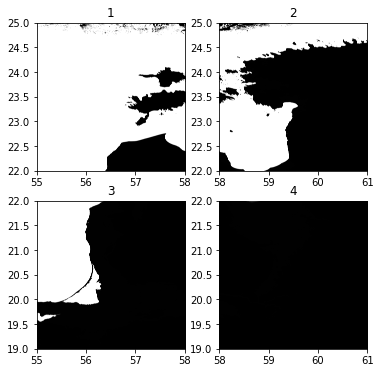

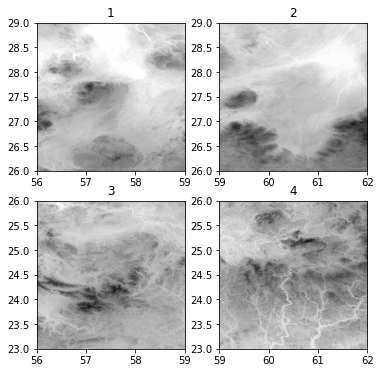

In [143]:
seconds_cnt = 9
scale_in_deg, rect_side_in_px = get_scale_in_degrees_and_rect_side_in_px(seconds_cnt)

res_dict = {}
rects = [[], [], [], []]

prev_right_shift = 0
prev_bottom_shift = 0

for i in range(len(elev_arr[0]) - 1):
    rects[0] = elev_arr[0][i]
    rects[1] = elev_arr[0][i + 1]
    rects[2] = elev_arr[1][i]
    rects[3] = elev_arr[1][i + 1]
    
    tails, right_shift, bottom_shift = split_rect_in_defined_tails(rects, int(rect_side_in_px), 
                                                                   prev_right_shift, prev_bottom_shift, 1)
    temp(np.array(tails), gdal_ds[0][i], prev_right_shift, prev_bottom_shift, scale_in_deg, res_dict)
    plot_image_grid(np.array(tails), gdal_ds[0][i], prev_right_shift, prev_bottom_shift, scale_in_deg)
    prev_right_shift = right_shift
    prev_bottom_shift = bottom_shift

for key, value in res_dict.items():
    print(key, np.shape(value))

5.0 60.0
10.0 55.0


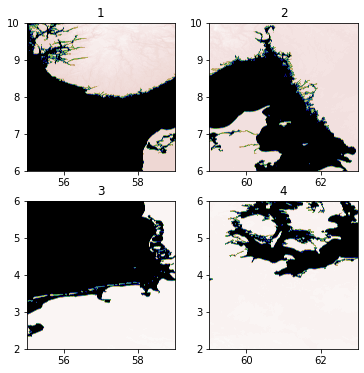

In [78]:
plot_image_grid(np.array(tails), gdal_ds[0], 0, 0, scale_in_deg)

2401 2401


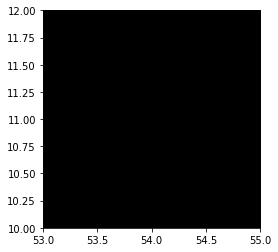

In [165]:
tail_idx = 3

nrows, ncols = np.shape(tails[tail_idx])
print(nrows, ncols)

# I'm making the assumption that the image isn't rotated/skewed/etc. 
# This is not the correct method in general, but let's ignore that for now
# If dxdy or dydx aren't 0, then this will be incorrect
x0, dx, dxdy, y0, dydx, dy = ds4.GetGeoTransform()

x1 = x0 + dx * ncols
y1 = y0 + dy * nrows

plt.imshow(tails[tail_idx], cmap='gist_earth', extent=[y1, y0, x0, x1])
plt.show()

In [77]:
print(dx, dydx, y1)

0.0008333333333333334 0.0 52.99916666666667
